In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Fit Calculations:
 slope(m) = 3.964438e-15 V/Hz
 intercept(c) = -1.986722e+00 V
Physics Calculations:
h = 6.351030e-34 J*s
phi = 1.9867 ± 0.0845V


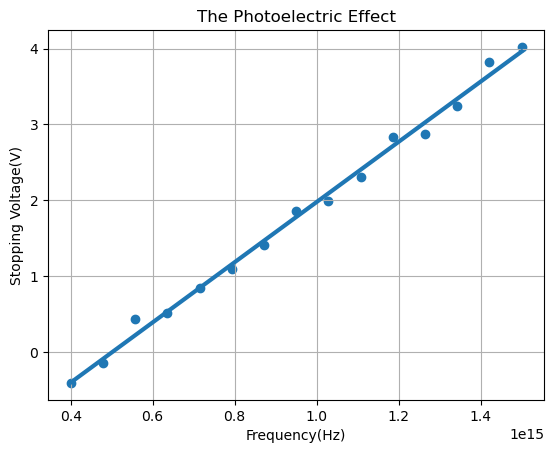

In [2]:
# Loading Data
data = np.loadtxt("photoelectric.csv", delimiter=",", skiprows=1)
f = data[:, 0] # Frequency(Hz)
v = data[:,1] # Stopping Voltage(V)

# Defining the Linear Model
def linear_model(f,m,c):
    return m * f + c

# Fitting with Curve
popt, pcov = curve_fit(linear_model, f, v)
m, c = popt

# Calculating Quantities
e = 1.602e-19 # elementary charge(c)

h = m * e # Planck constant(J*s)
phi = -c # Volts

# Calculating Uncertainty
uc = np.sqrt(pcov[1,1])
uphi = uc

# Printing Results
print("Fit Calculations:")
print(f" slope(m) = {m:.6e} V/Hz")
print(f" intercept(c) = {c:.6e} V")
print("Physics Calculations:") # Calculating Planck and Work function
print(f"h = {h:.6e} J*s")
print(f"phi = {phi:.4f} ± {uphi:.4f}V")

# Based on my calculated phi, I would hypothesize that the metal it is likely made of Cesium as it is the metal most applicable within the range of the work function.  

# Plotting Data and Best Fit Line
f_line=np.linspace(f.min(),f.max(),300)
v_line = linear_model(f_line, m, c)

plt.scatter(f,v,label="data")
plt.plot(f_line, v_line, linewidth=3, label="Best Fit")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Stopping Voltage(V)")
plt.title("The Photoelectric Effect")
plt.grid(True)
plt.legend
plt.show()

Non-Linear Fit:
N0 = 788.942
lambda = 0.09523
background = 23.475
half-life = 7.279
Linearized Fit:
lambda(linear) = 0.05906


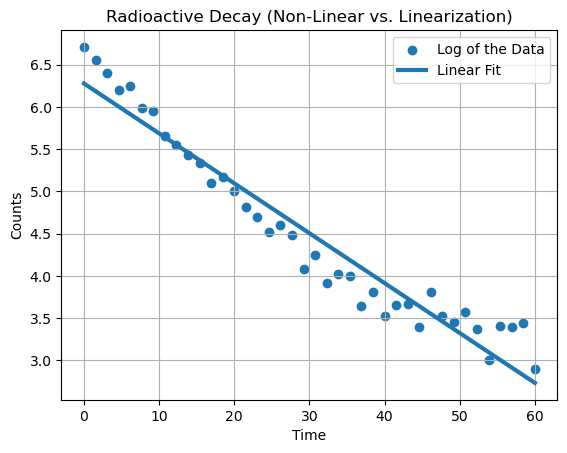

In [3]:
# Problem 2

data = np.loadtxt("decay_data.csv", delimiter=",", skiprows=1)
t = data[:,0]
ct = data[:,1]

# Method A : The Non-Linear Fit
# Defining Decaying Model
def decay_model(t, N0, lam, bg):
    return N0 * np.exp(-lam * t) + bg

# Initial Guessses
p0 = [550, 0.8, 50]

parameters, pcov = curve_fit(decay_model, t, ct, p0=p0)
N0, lam, bg = parameters

half_life = np.log(2) / lam

print("Non-Linear Fit:")
print(f"N0 = {N0:.3f}")
print(f"lambda = {lam:.5f}")
print(f"background = {bg:.3f}")
print(f"half-life = {half_life:.3f}")

# Method B : Linearization Check
log_ct = np.log(ct)

def linear_model(x, m, c):
    return m * x + c


parameters_lin, pcov_lin = curve_fit(linear_model, t, log_ct)

m, c = parameters_lin

lambda_linear = -m

print("Linearized Fit:")
print(f"lambda(linear) = {lambda_linear:.5f}")

# Comparison Plot
t_line = np.linspace(min(t), max(t), 300)
log_line = linear_model(t_line, m, c)

plt.scatter(t, log_ct, label="Log of the Data")
plt.plot(t_line, log_line, label="Linear Fit", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Counts")
plt.title("Radioactive Decay (Non-Linear vs. Linearization)") 
plt.grid(True)
plt.legend()
plt.show()

# (i) : The log of Data fit is better because with the data, you're making predictions and with predictions, the data isn't go to be perfect enough where the line will be that linearly constant. With the Log of the Data, it contains noise, which is an indication of accuracy when it comes to predictions. It's also better because it fits the physical equation better while taking the background into account, which the linear model doesn't.  
# (ii) : It doesn't look like a straight line the whole time; it starts to fail around halfway and bends a little towards the end. It starts to fail because the linear model is meant to stay constant and doesn't take into account of the background. Maybe eliminating the background term would make it a better fit.

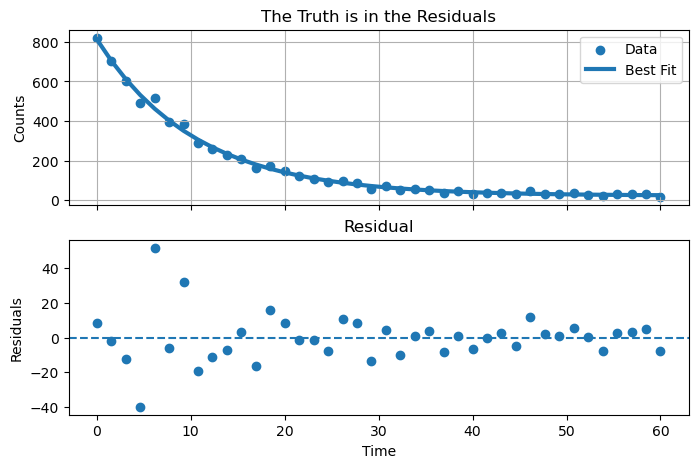

In [4]:
# Problem 3

data = np.loadtxt("decay_data.csv", delimiter=",", skiprows=1)
t = data[:,0]
ct = data[:,1]

# Method A : The Non-Linear Fit
# Defining Decaying Model
def decay_model(t, N0, lam, bg):
    return N0 * np.exp(-lam * t) + bg

# Initial Guessses
p0 = [550, 0.8, 50]

parameters, pcov = curve_fit(decay_model, t, ct, p0=p0)
N0, lam, bg = parameters

fit_ct = decay_model(t, N0, lam, bg)

# Setting residuals
residuals = ct - fit_ct

#2-Panel Plot
plt.subplots(2, 1, sharex=True, figsize=(8,5))

plt.subplot(2, 1, 1,)
plt.scatter(t, ct, label="Data")
plt.plot(t, fit_ct, label="Best Fit", linewidth=3)
plt.ylabel("Counts")
plt.title("The Truth is in the Residuals")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2,)
plt.scatter(t, residuals)
plt.axhline(0, linestyle="--")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.title("Residual")


plt.show()
# It looks like random noise and this tells us that the model is an accurate depiction of the data.

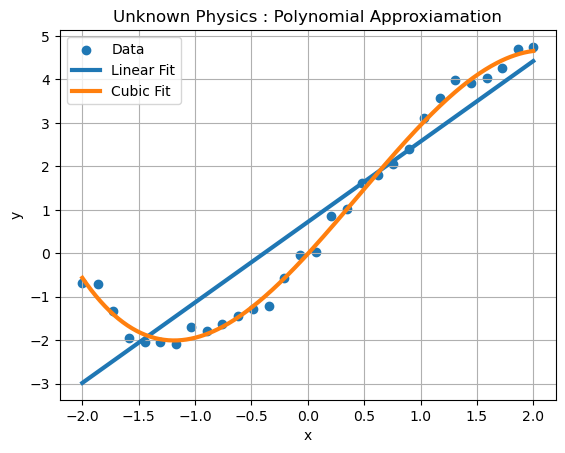

In [5]:
#Problem 4

data = np.loadtxt("mystery_data.csv", delimiter=",", skiprows=1)
x = data[:,0]
y = data[:,1]

# Define Models
def poly1(x, a, b):
    return a * x + b

def poly3(x, a, b, c, d):
    return a * x ** 3 + b* x ** 2 + c * x + d

# Fit the models
parameters1, _ = curve_fit(poly1, x, y)
parameters3, _ = curve_fit(poly3, x, y)

# Creating a Curve
x_line = np.linspace(min(x), max(x), 300)
y1_line = poly1(x_line, *parameters1)
y3_line = poly3(x_line, *parameters3)

# Plotting Data
plt.scatter(x, y, label = "Data")
plt.plot(x_line, y1_line, label="Linear Fit", linewidth=3)
plt.plot(x_line, y3_line, label="Cubic Fit", linewidth=3)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Unknown Physics : Polynomial Approxiamation")
plt.legend()
plt.grid(True)
plt.show()

# Question Response : 2, maybe 3 but that's about how many times the Cubic Fit intersects with the Linear fit.